In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
data2015 = pd.read_csv("mixed_cities/2015H1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2016 = pd.read_csv("mixed_cities/2016H1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2017 = pd.read_csv("mixed_cities/2017H1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2018 = pd.read_csv("mixed_cities/2018H1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")

data2019Q1 = pd.read_csv("mixed_cities/2019Q1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2019Q2 = pd.read_csv("mixed_cities/2019Q2.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2019Q3 = pd.read_csv("mixed_cities/2019Q3.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2019Q4 = pd.read_csv("mixed_cities/2019Q4.csv", skiprows=4, parse_dates=["Date"], index_col="Date")

data2020Q1 = pd.read_csv("mixed_cities/2020Q1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2020Q2 = pd.read_csv("mixed_cities/2020Q2.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2020Q3 = pd.read_csv("mixed_cities/2020Q3.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2020Q4 = pd.read_csv("mixed_cities/2020Q4.csv", skiprows=4, parse_dates=["Date"], index_col="Date")

data2021Q1 = pd.read_csv("mixed_cities/2021Q1.csv", parse_dates=["Date"], index_col="Date")
data2021Q2 = pd.read_csv("mixed_cities/2021Q2.csv", parse_dates=["Date"], index_col="Date")
data2021Q3 = pd.read_csv("mixed_cities/2021Q3.csv", parse_dates=["Date"], index_col="Date")
data2021Q4 = pd.read_csv("mixed_cities/2021Q4.csv", parse_dates=["Date"], index_col="Date")

data2022 = pd.read_csv("mixed_cities/2022.csv", parse_dates=["Date"], index_col="Date")

all2019 = [data2019Q1, data2019Q2, data2019Q3, data2019Q4]
all2020 = [data2020Q1, data2020Q2, data2020Q3, data2020Q4]
all2021 = [data2021Q1, data2021Q2, data2021Q3, data2021Q4]

data2019 = pd.concat(all2019)
data2020 = pd.concat(all2020)
data2021 = pd.concat(all2021)

In [3]:
data2015

,Country,City,Specie,count,min,max,median,variance
Date,,,,,,,,
2015-01-06,KR,Jeonju,co,124,0.1,12.3,4.5,55.74
2015-01-22,KR,Jeonju,co,116,4.5,10.0,6.7,16.09
2015-03-30,KR,Jeonju,co,118,1.2,11.2,5.6,35.98
2015-05-27,KR,Jeonju,co,93,2.3,5.6,3.4,6.54
2015-02-03,KR,Jeonju,co,133,4.5,13.4,7.8,39.24
...,...,...,...,...,...,...,...,...
2015-06-05,MK,Skopje,no2,72,1.3,22.7,4.0,288.64
2015-04-25,MK,Skopje,no2,71,1.3,27.7,4.4,384.63
2015-05-16,MK,Skopje,no2,72,1.0,23.1,6.0,319.02


In [4]:
cleaned2015 = data2015.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2016 = data2016.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2017 = data2017.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2018 = data2018.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2019 = data2019.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2020 = data2020.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2021 = data2021.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2022 = data2022.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2015 = cleaned2015.set_index('Date')
cleaned2016 = cleaned2016.set_index('Date')
cleaned2017 = cleaned2017.set_index('Date')
cleaned2018 = cleaned2018.set_index('Date')
cleaned2019 = cleaned2019.set_index('Date')
cleaned2020 = cleaned2020.set_index('Date')
cleaned2021 = cleaned2021.set_index('Date')
cleaned2022 = cleaned2022.set_index('Date')

In [5]:
cleaned2015

,Country,City,aqi,co,mepaqi,neph,no2,o3,pm10,pm25,psi,so2,uvi
Date,,,,,,,,,,,,,
2014-12-29,AT,Graz,,0.1,,,9.0,,13.0,,,1.6,
2014-12-29,AT,Innsbruck,,0.1,,,25.6,,25.0,,,1.6,
2014-12-29,AT,Linz,,0.1,,,14.2,,25.0,74.0,,2.1,
2014-12-29,AT,Salzburg,,0.1,,,21.1,,21.0,,,2.1,
2014-12-29,AT,Vienna,,0.1,,,9.0,,20.0,65.0,,2.6,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-05,US,Tucson,,,,,,28.1,9.0,21.0,,,
2015-07-05,US,Washington D.C.,,2.9,,,5.6,15.9,,61.0,,0.5,
2015-07-05,VN,Hanoi,,8.9,,,20.7,12.5,,,,25.8,


In [6]:
Paris_Data = pd.concat([cleaned2015[cleaned2015['City']=='Paris'], cleaned2016[cleaned2016['City']=='Paris'],
                     cleaned2017[cleaned2017['City']=='Paris'], cleaned2018[cleaned2018['City']=='Paris'], 
                     cleaned2019[cleaned2019['City']=='Paris'], cleaned2020[cleaned2020['City']=='Paris'],
                     cleaned2021[cleaned2021['City']=='Paris'], cleaned2022[cleaned2022['City']=='Paris']])
Paris_Data = Paris_Data.replace(r'^\s*$', np.nan, regex=True)

In [7]:
Paris_Data.isna().sum()

Country             0
City                0
aqi              1894
co                 70
mepaqi           1894
neph             1894
no2                 1
o3                  1
pm10                1
pm25                0
psi              1894
so2                87
uvi              1894
pol              1894
d                1894
humidity          700
pm1              1894
pressure          700
temperature       700
wd               1894
wind-speed        768
precipitation    1894
wind-gust         772
dew               753
wind gust        1814
wind speed       1810
dtype: int64

In [8]:
Athens_Data = pd.concat([cleaned2015[cleaned2015['City']=='Athens'], cleaned2016[cleaned2016['City']=='Athens'],
                     cleaned2017[cleaned2017['City']=='Athens'], cleaned2018[cleaned2018['City']=='Athens'], 
            a         cleaned2019[cleaned2019['City']=='Athens'], cleaned2020[cleaned2020['City']=='Athens'],
                     cleaned2021[cleaned2021['City']=='Athens'], cleaned2022[cleaned2022['City']=='Athens']])
Athens_Data = Athens_Data.replace(r'^\s*$', np.nan, regex=True)

In [9]:
Athens_Data.isna().sum()

Country            0
City               0
aqi              861
co               355
mepaqi           861
neph             861
no2                8
o3                 9
pm10               7
pm25              24
psi              861
so2               21
uvi              861
pol              861
d                861
humidity          22
pm1              861
pressure          22
temperature       22
wd               861
wind-speed        88
precipitation    861
wind-gust         92
dew               56
wind gust        778
wind speed       774
dtype: int64

In [10]:
#KEEP ONLY NEEDED COLUMNS AND TRANSFORM THE VALUES TO NUMERIC
cols=['pm25', 'pm10', 'no2', 'o3', 'so2']

Athens_Data = Athens_Data.loc[:, Athens_Data.columns.intersection(cols)]
Paris_Data = Paris_Data.loc[:, Paris_Data.columns.intersection(cols)]

#make columns numeric
Athens_Data = Athens_Data.apply(pd.to_numeric, errors='coerce')
Paris_Data = Paris_Data.apply(pd.to_numeric, errors='coerce')

#remove duplicated values with the same datetime index
Athens_Data = Athens_Data.iloc[1: , :]
Athens_Data = Athens_Data[~Athens_Data.index.duplicated(keep='first')]

Paris_Data = Paris_Data[~Paris_Data.index.duplicated(keep='first')]

#fill nan values with forward and backward filling
Athens_Data = Athens_Data.fillna(method='ffill')
Athens_Data = Athens_Data.fillna(method='bfill')

Paris_Data = Paris_Data.fillna(method='ffill')
Paris_Data = Paris_Data.fillna(method='bfill')

## Add weather data to the dataframes for the multivariate models

In [11]:
#PARIS WEATHER DATA
part1 = pd.read_csv('Paris 2014-12-29 to 2014-12-31.csv', parse_dates=["datetime"], index_col="datetime")
part2 = pd.read_csv('Paris 2015-01-01 to 2016-12-31.csv', parse_dates=["datetime"], index_col="datetime")
part3 = pd.read_csv('Paris 2017-01-01 to 2019-07-31.csv', parse_dates=["datetime"], index_col="datetime")
part4 = pd.read_csv('Paris 2019-08-01 to 2022-03-18.csv', parse_dates=["datetime"], index_col="datetime")

all_weather_cond = [part1, part2, part3, part4]
paris_weather = pd.concat(all_weather_cond)

cols=['temp', 'dew', 'humidity', 'windspeed', 'winddir', 'datetime']

paris_weather = paris_weather.loc[:, paris_weather.columns.intersection(cols)]

paris_weather = paris_weather.fillna(method="bfill")

paris_merged = Paris_Data.merge(paris_weather, left_index=True, right_index=True, how='inner')

In [12]:
paris_merged

,no2,o3,pm10,pm25,so2,temp,dew,humidity,windspeed,winddir
2014-12-29,26.1,3.7,29.0,74.0,2.1,0.1,-3.2,78.7,16.5,299.8
2014-12-30,28.8,4.5,29.0,68.0,2.1,3.4,0.5,82.3,11.1,314.3
2014-12-31,38.4,3.7,43.0,94.0,2.1,3.5,-0.3,76.8,6.9,217.8
2015-01-01,33.9,9.4,42.0,113.0,1.6,1.4,-1.7,81.0,15.7,197.4
2015-01-02,28.8,6.5,27.0,73.0,1.1,5.4,2.6,83.0,19.6,235.1
...,...,...,...,...,...,...,...,...,...,...
2022-03-14,16.0,22.1,17.0,35.0,0.3,9.5,4.3,72.7,13.8,160.3
2022-03-15,24.1,9.9,16.0,47.0,0.3,10.1,8.1,88.1,12.4,115.5
2022-03-16,20.0,6.4,33.0,61.0,0.3,11.2,8.6,84.7,20.5,158.3
2022-03-17,11.1,23.0,16.0,39.0,0.3,8.8,4.3,73.4,21.5,135.6


In [13]:
#ATHENS WEATHER DATA
athens_weather = pd.read_csv('Athens 2019-11-07 to 2022-03-19.csv', parse_dates=["datetime"], index_col="datetime")

cols=['temp', 'dew', 'humidity', 'windspeed', 'winddir', 'datetime']

athens_weather = athens_weather.loc[:, athens_weather.columns.intersection(cols)]

athens_weather = athens_weather.fillna(method="bfill")

athens_merged = Athens_Data.merge(athens_weather, left_index=True, right_index=True, how='inner')

In [14]:
athens_merged

,no2,o3,pm10,pm25,so2,temp,dew,humidity,windspeed,winddir
2019-11-07,17.4,27.7,48.0,54.0,1.1,21.1,16.1,74.20,20.0,160.1
2019-11-08,13.3,27.7,31.0,54.0,1.6,20.0,14.5,71.00,18.7,117.1
2019-11-09,13.8,26.9,17.0,41.0,1.6,17.2,11.9,72.24,15.4,136.7
2019-11-10,8.3,30.1,12.0,33.0,1.6,18.2,14.5,79.00,18.2,213.3
2019-11-11,11.5,22.8,18.0,36.0,1.6,17.1,13.1,77.69,6.9,174.5
...,...,...,...,...,...,...,...,...,...,...
2022-03-15,11.9,31.3,24.0,61.0,4.6,7.7,-0.9,56.10,20.1,229.4
2022-03-16,13.8,31.7,30.0,74.0,5.1,8.3,3.1,70.50,20.0,172.8
2022-03-17,11.0,33.8,32.0,70.0,3.6,11.0,5.2,68.90,25.7,133.7
2022-03-18,7.4,36.2,22.0,53.0,2.1,7.2,-1.4,54.90,32.0,81.1


In [15]:
#scale data
scaler = MinMaxScaler()
scaled_Athens = scaler.fit_transform(athens_merged)
scaled_Paris = scaler.fit_transform(paris_merged)

#store scaled data to a dataframe object

#Athens
scaled_Athens = pd.DataFrame(scaled_Athens, columns = ['no2', 'o3', 'pm10', 'pm25', 'so2', 'temp',
                                                         'dew', 'humidity', 'windspeed', 'winddir'])

scaled_Athens.index = athens_merged.index

#Paris
scaled_Paris = pd.DataFrame(scaled_Paris, columns = ['no2', 'o3', 'pm10', 'pm25', 'so2', 'temp',
                                                         'dew', 'humidity', 'windspeed', 'winddir'])

scaled_Paris.index = paris_merged.index

In [16]:
#save data to csv files
scaled_Athens.to_csv('Athens_data.csv')
scaled_Paris.to_csv('Paris_data.csv')

## Visualize data (by year, month and day)

In [17]:
#Resampling the data creates nan values, I fill them with backward filling

<AxesSubplot:title={'center':'Yearly Paris Pollution through years 2015-2022'}, xlabel='Date'>

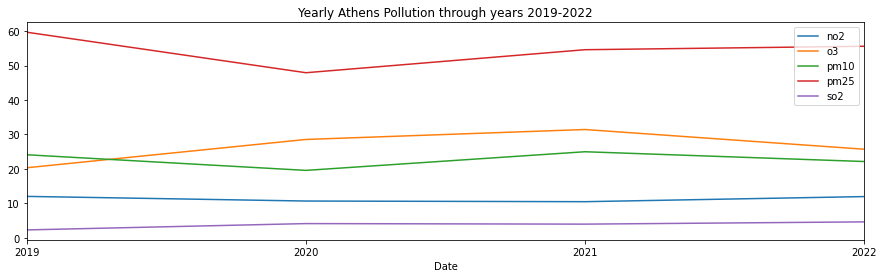

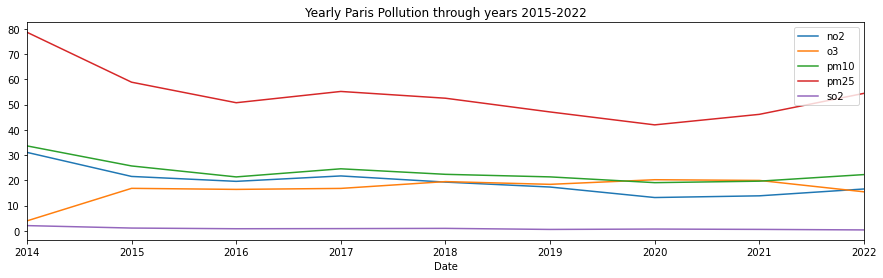

In [18]:
Athens_Data.resample("1y").mean().plot(figsize=(15,4), title="Yearly Athens Pollution through years 2019-2022")
Paris_Data.resample("1y").mean().plot(figsize=(15,4), title="Yearly Paris Pollution through years 2015-2022")

<AxesSubplot:title={'center':'Monthly Paris Pollution through years 2015-2022'}, xlabel='Date'>

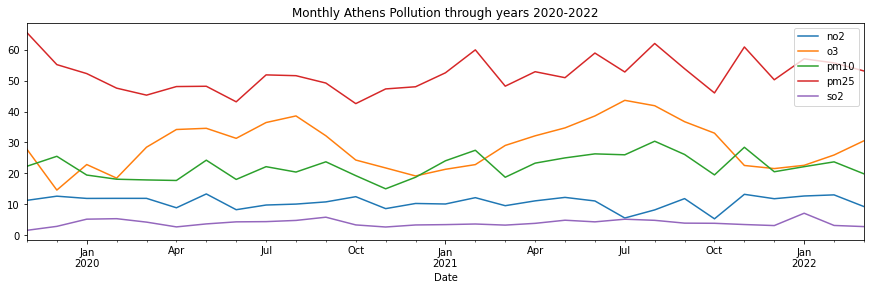

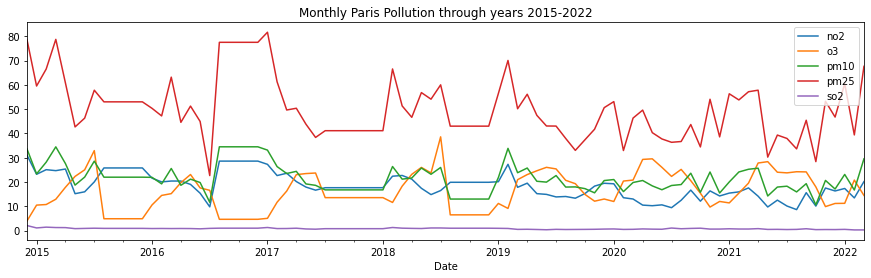

In [19]:
Athens_Data.resample("1m").mean().plot(figsize=(15,4), title="Monthly Athens Pollution through years 2020-2022")
Paris_Data.resample("1m").mean().bfill().plot(figsize=(15,4), title="Monthly Paris Pollution through years 2015-2022")

<AxesSubplot:title={'center':'Daily Paris Pollution through years 2015-2022'}, xlabel='Date'>

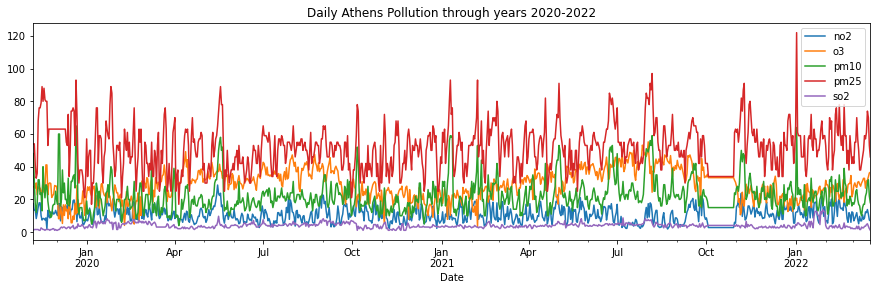

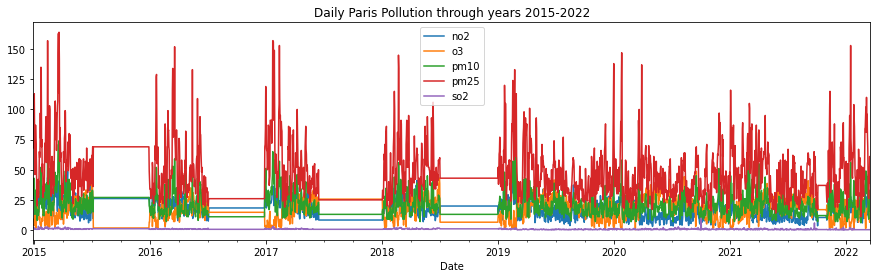

In [20]:
Athens_Data.resample("1d").mean().bfill().plot(figsize=(15,4), title="Daily Athens Pollution through years 2020-2022")
Paris_Data.resample("1d").mean().bfill().plot(figsize=(15,4), title="Daily Paris Pollution through years 2015-2022")

**The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns. With this we will be able to see the trend, seasonal, and residual components of our data.**

## Seasonality of yearly resampled data

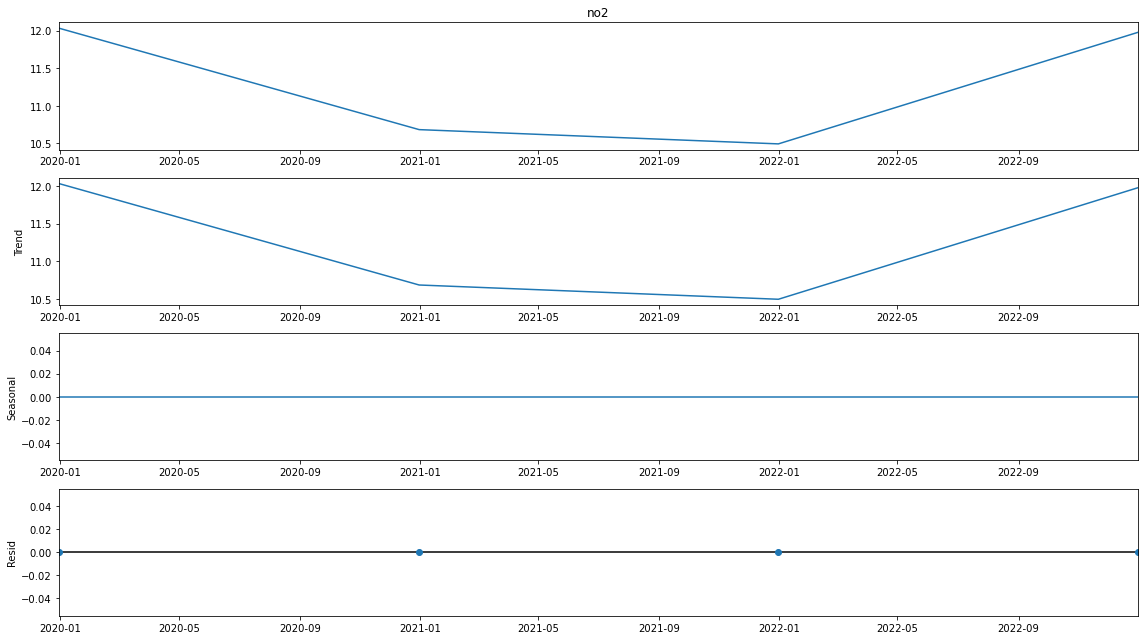

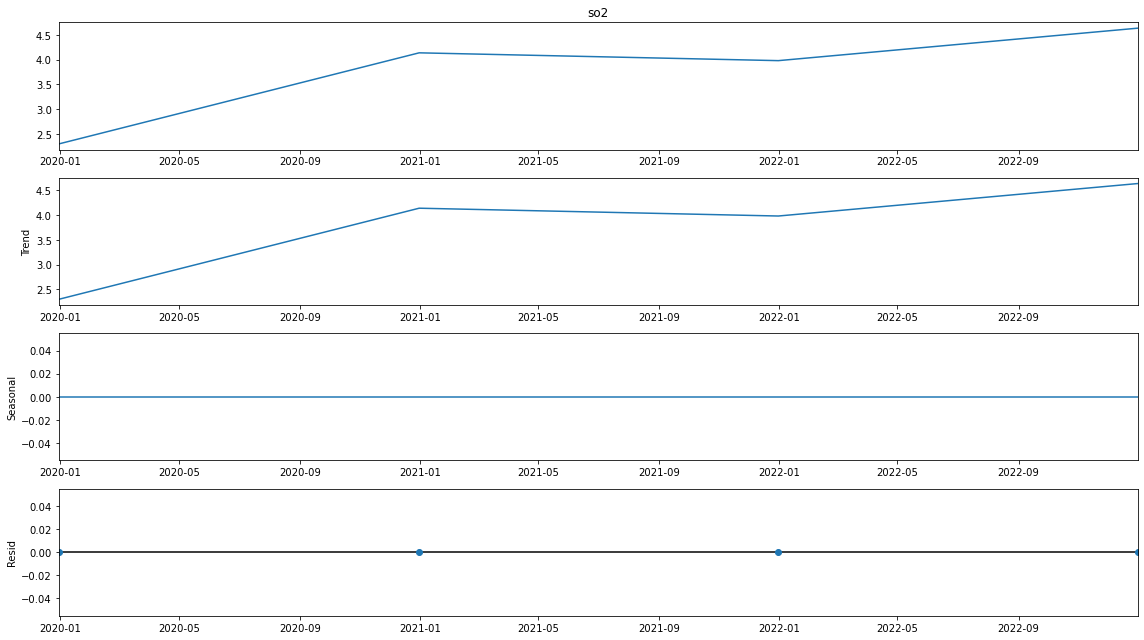

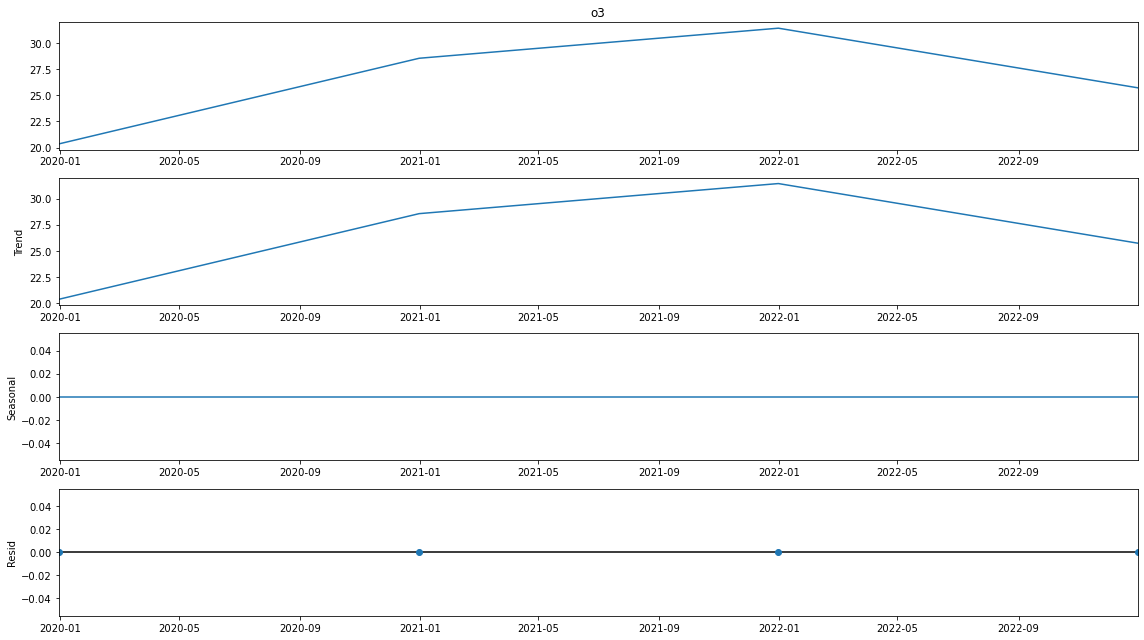

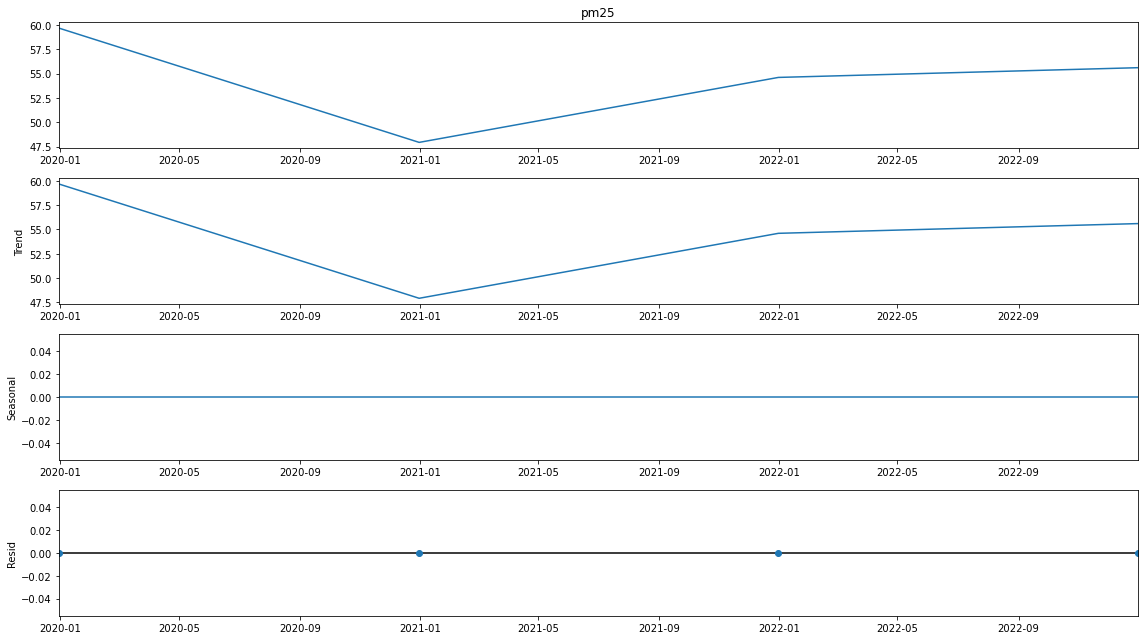

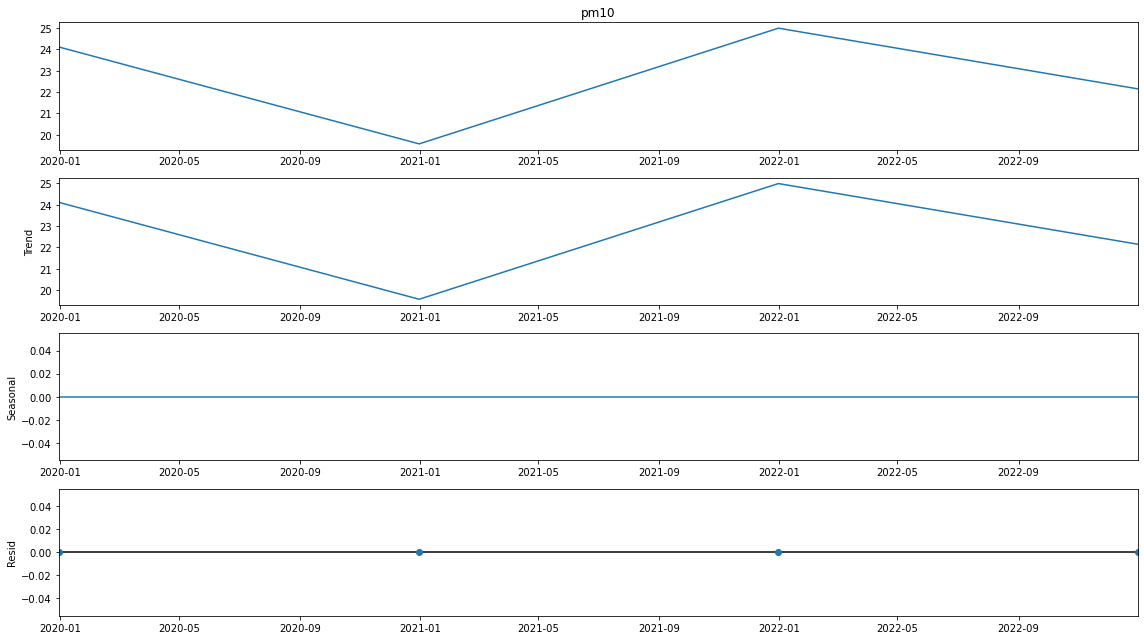

In [21]:
#ATHENS
model = seasonal_decompose((Athens_Data.resample('1y').mean().bfill())["no2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Athens_Data.resample('1y').mean().bfill())["so2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Athens_Data.resample('1y').mean().bfill())["o3"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Athens_Data.resample('1y').mean().bfill())["pm25"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Athens_Data.resample('1y').mean().bfill())["pm10"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

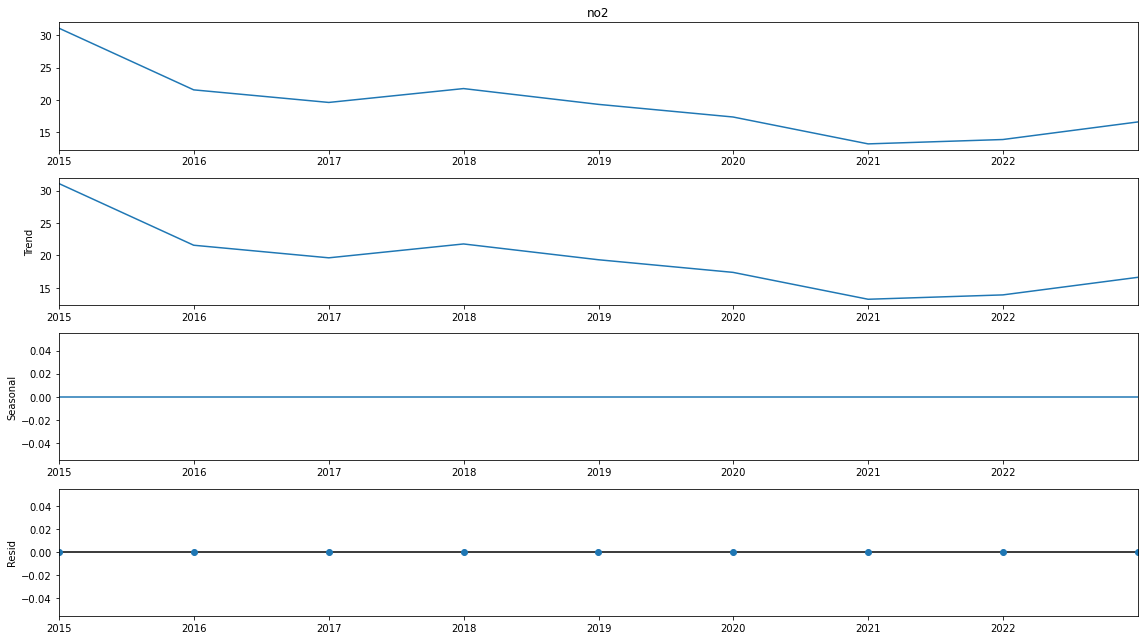

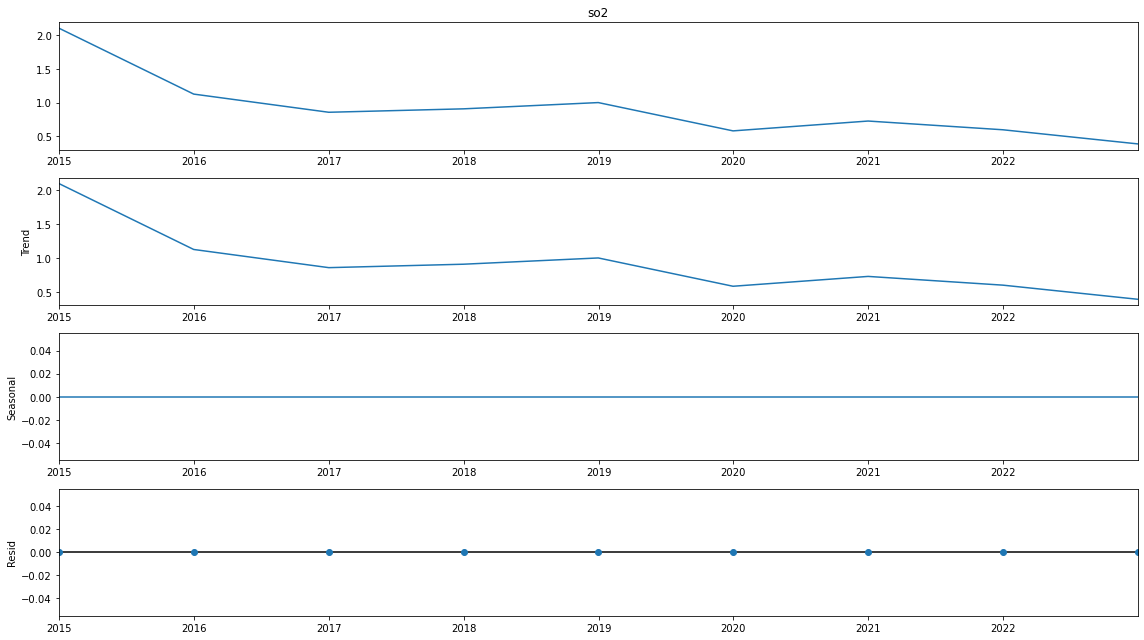

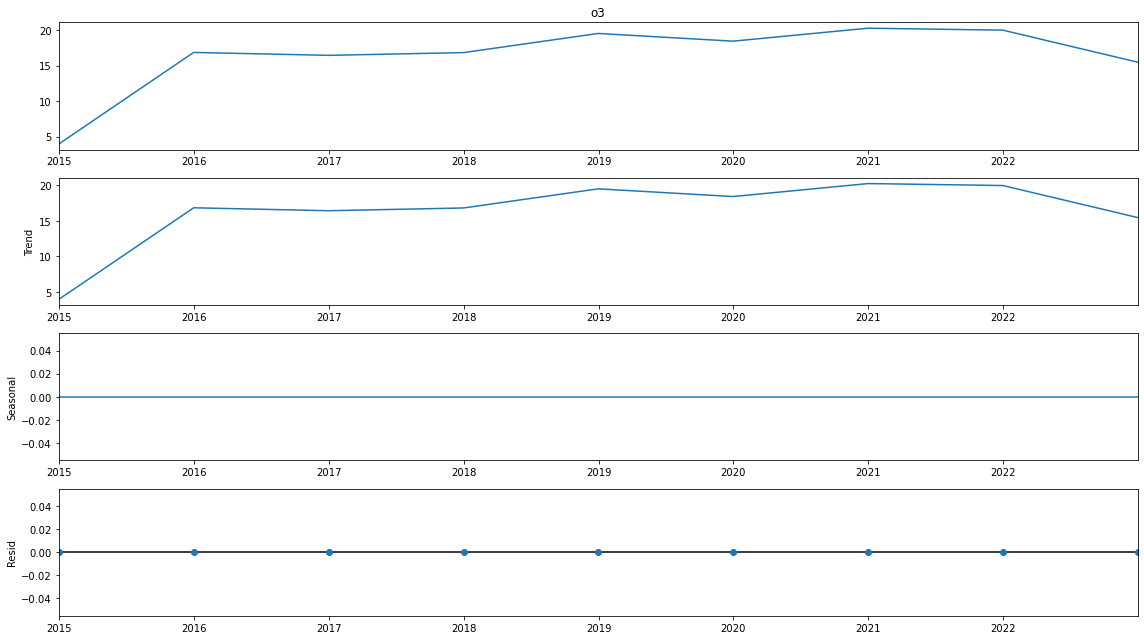

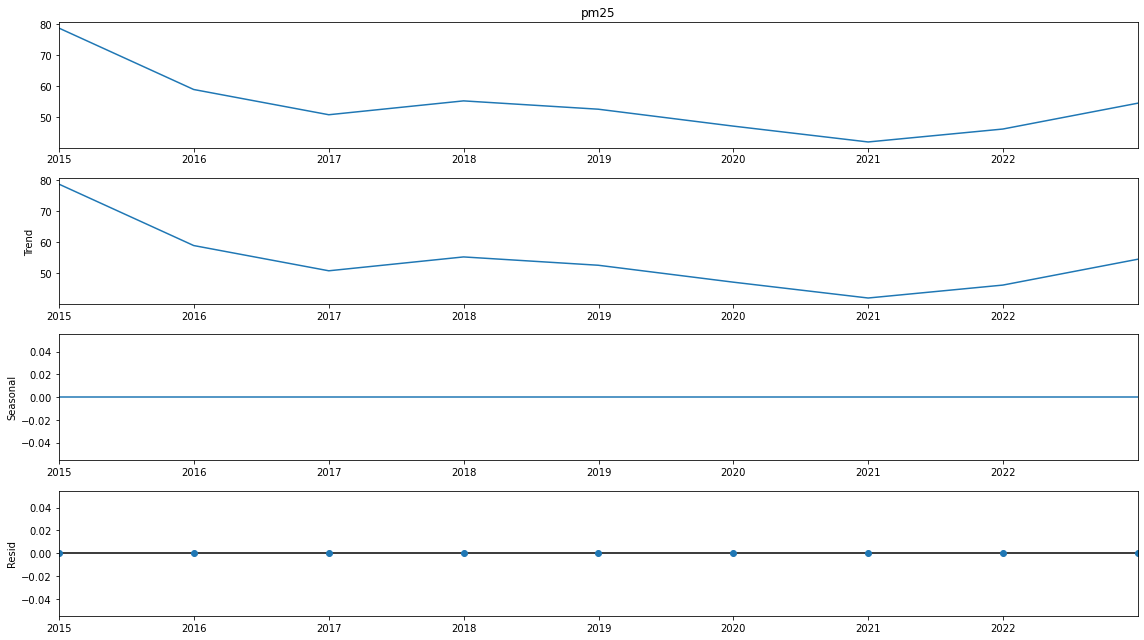

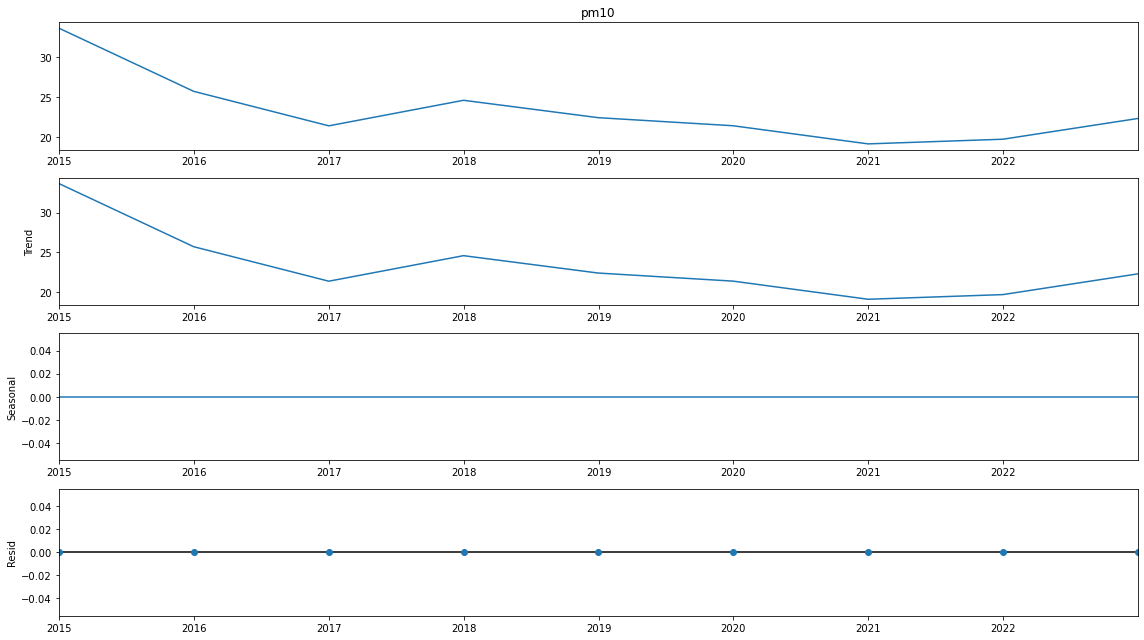

In [22]:
#Paris
model = seasonal_decompose((Paris_Data.resample('1y').mean().bfill())["no2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Paris_Data.resample('1y').mean().bfill())["so2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Paris_Data.resample('1y').mean().bfill())["o3"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Paris_Data.resample('1y').mean().bfill())["pm25"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Paris_Data.resample('1y').mean().bfill())["pm10"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

## Seasonality of monthly resampled data

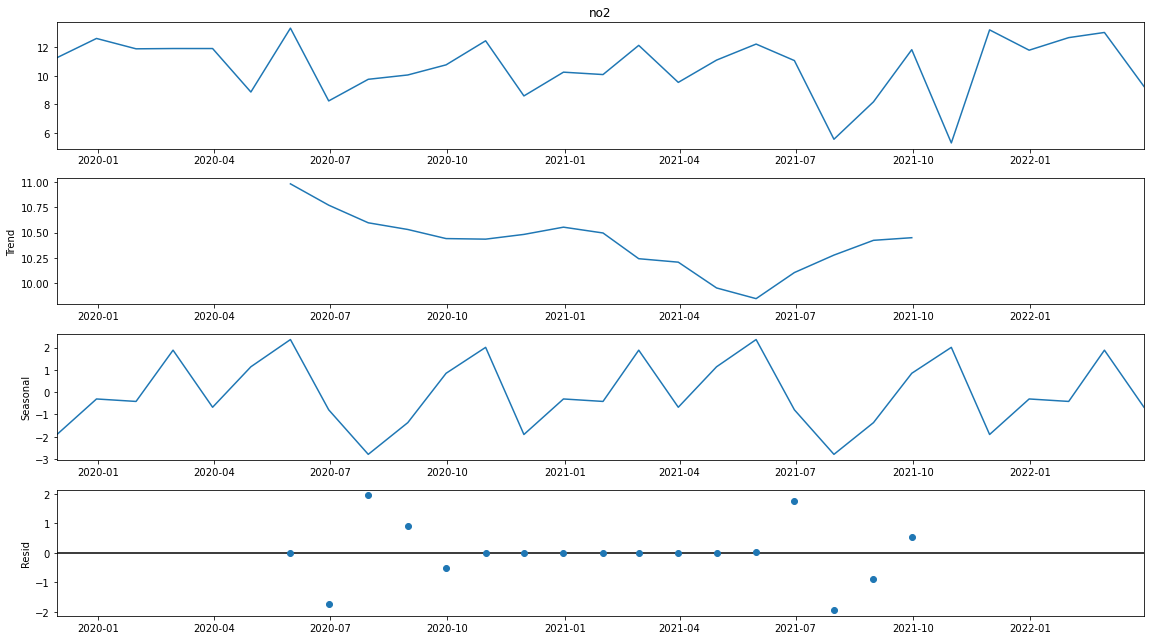

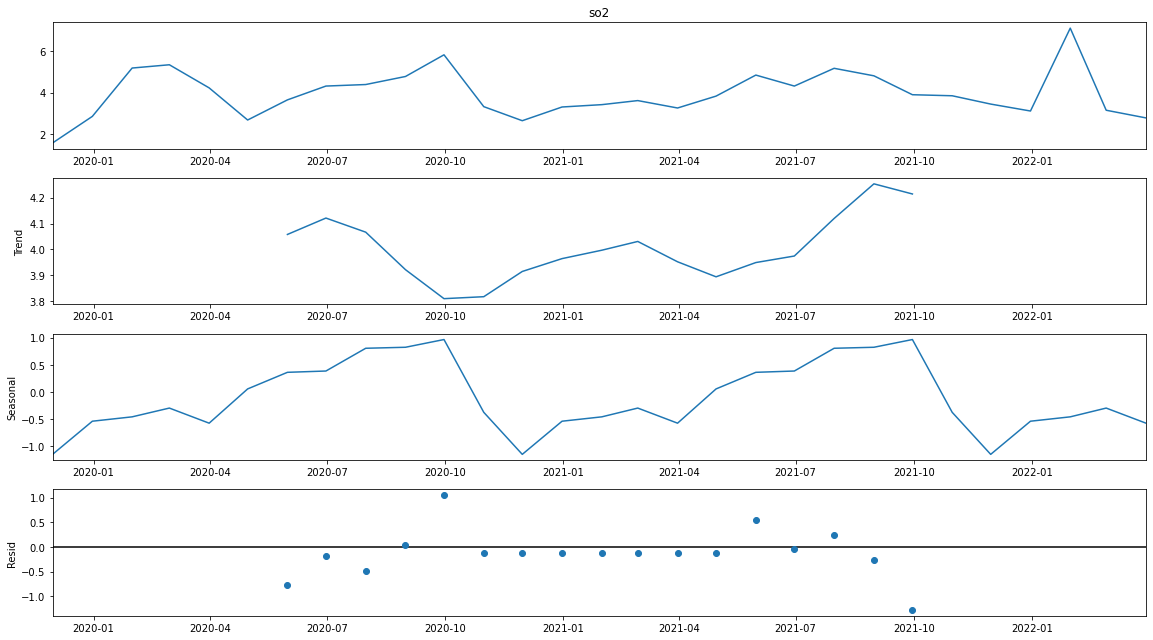

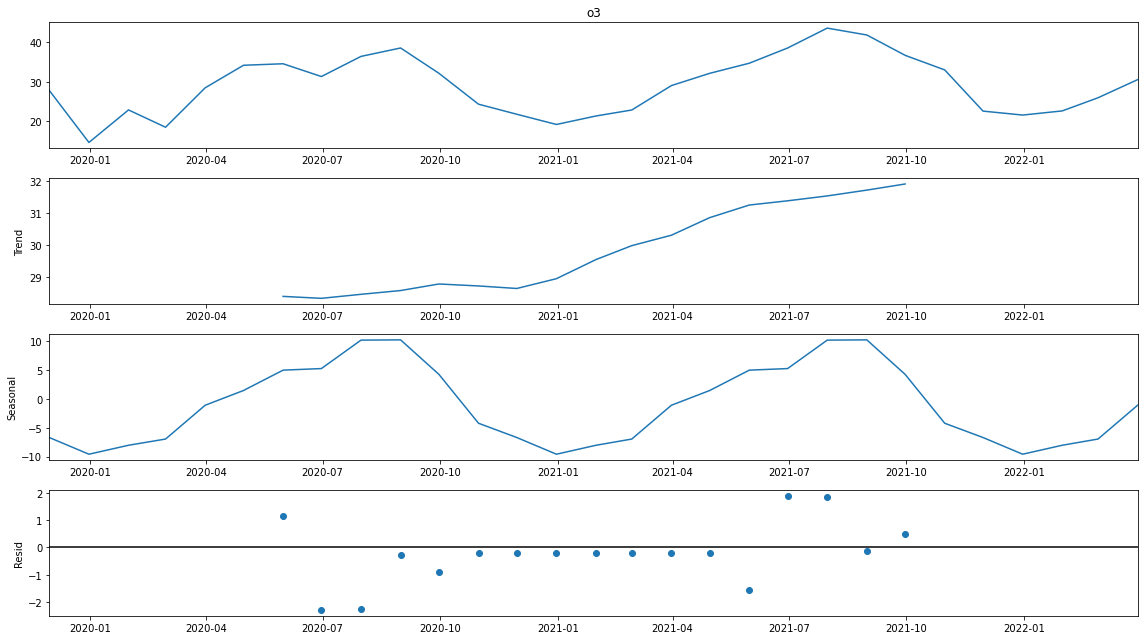

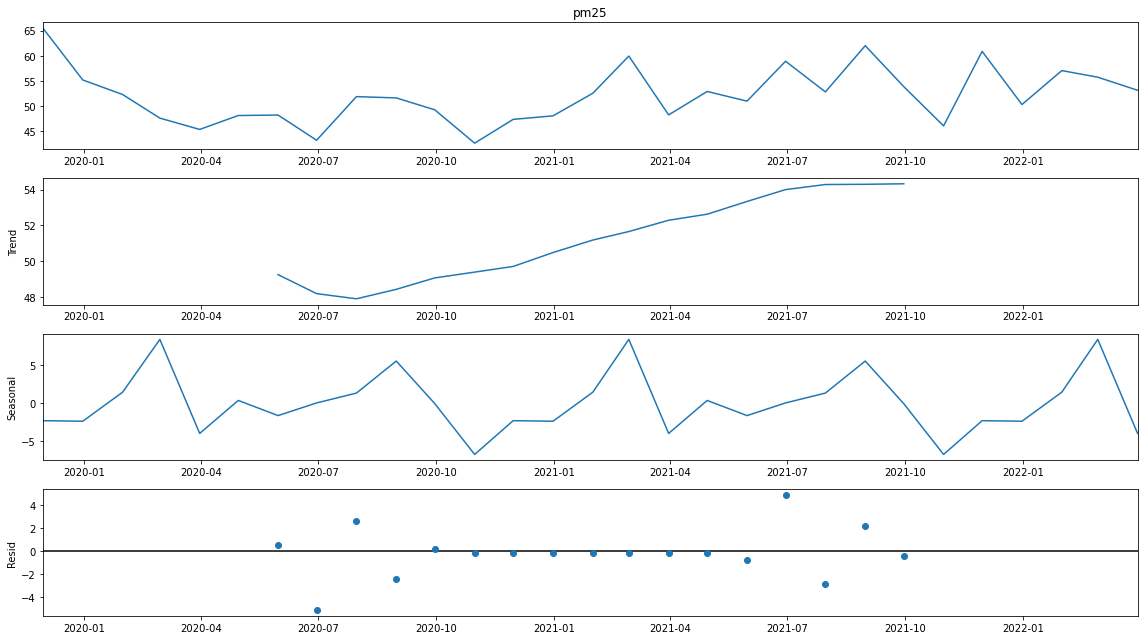

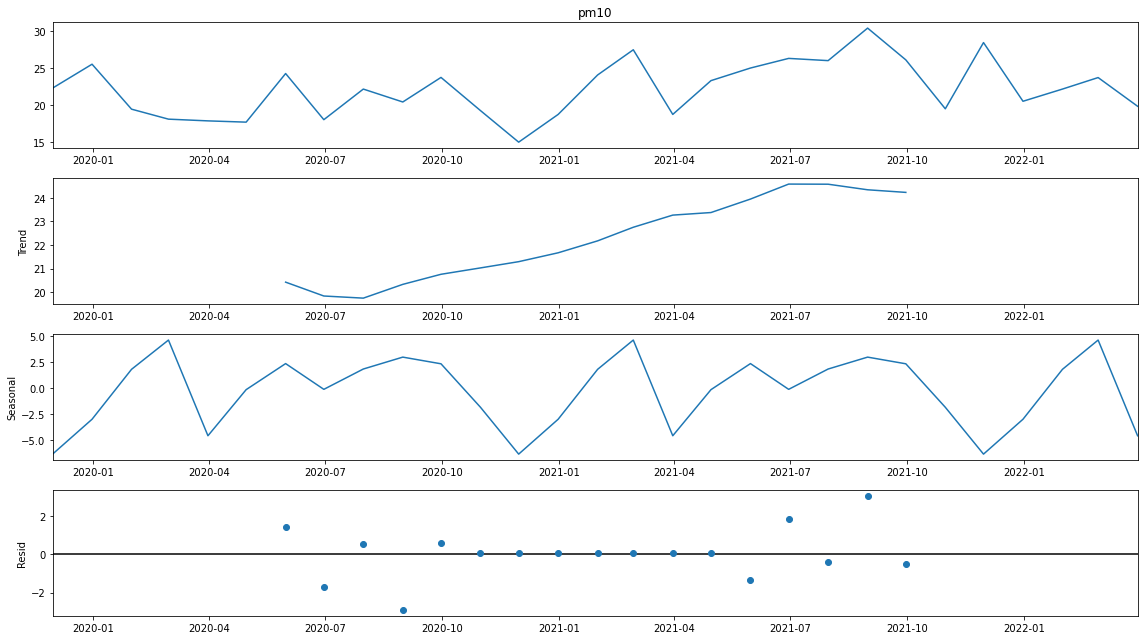

In [23]:
#ATHENS
model = seasonal_decompose((Athens_Data.resample('1m').mean().bfill())["no2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Athens_Data.resample('1m').mean().bfill())["so2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Athens_Data.resample('1m').mean().bfill())["o3"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Athens_Data.resample('1m').mean().bfill())["pm25"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Athens_Data.resample('1m').mean().bfill())["pm10"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

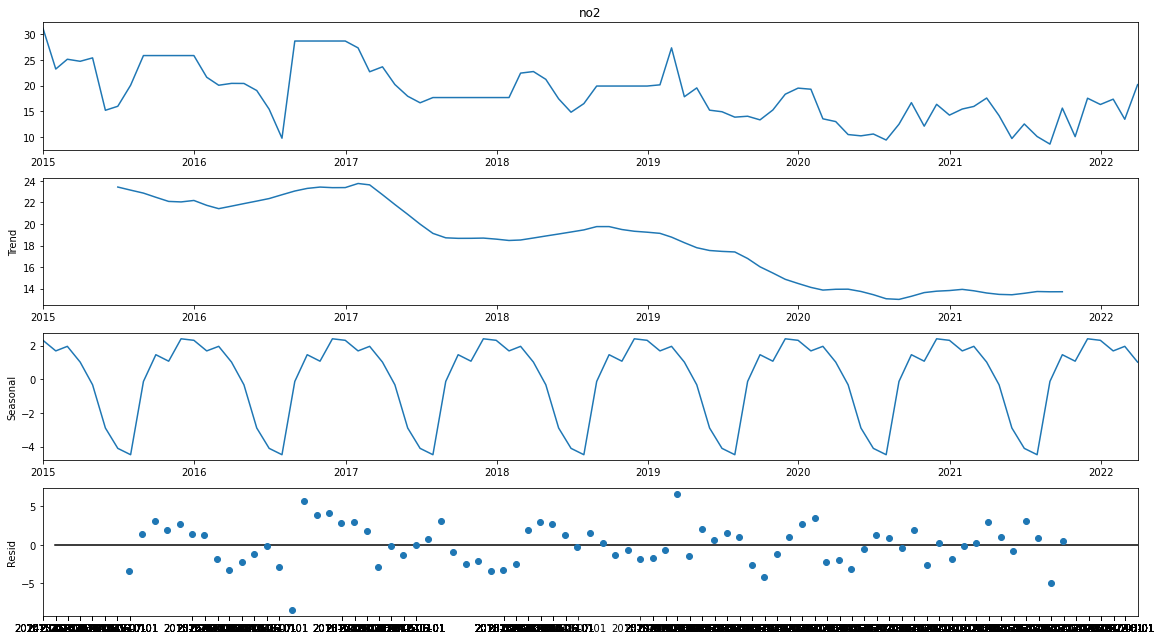

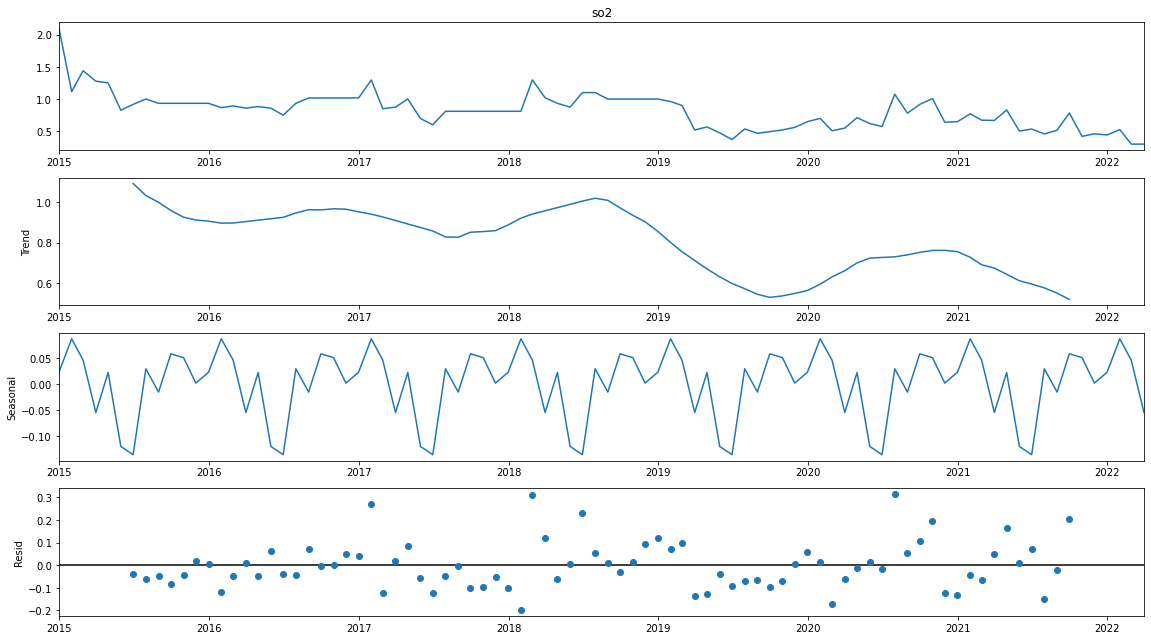

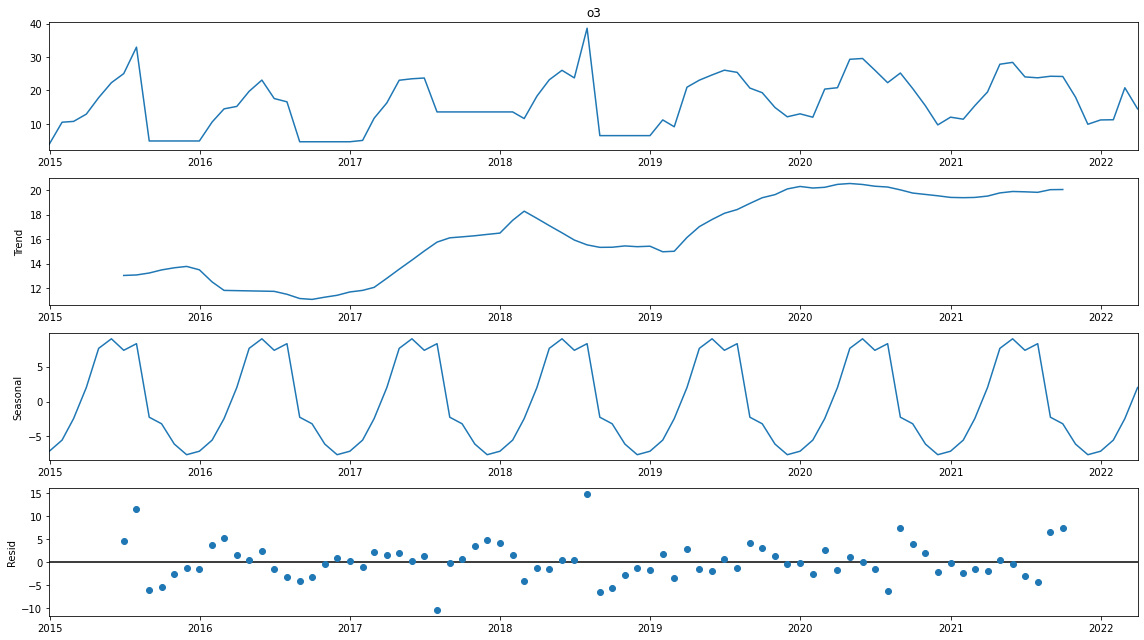

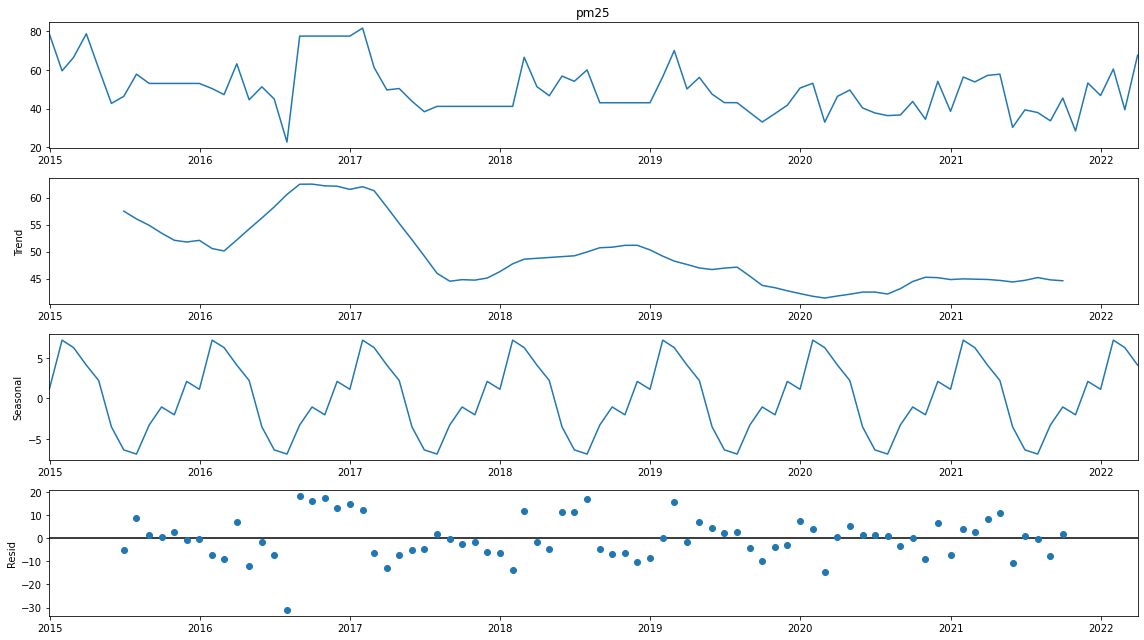

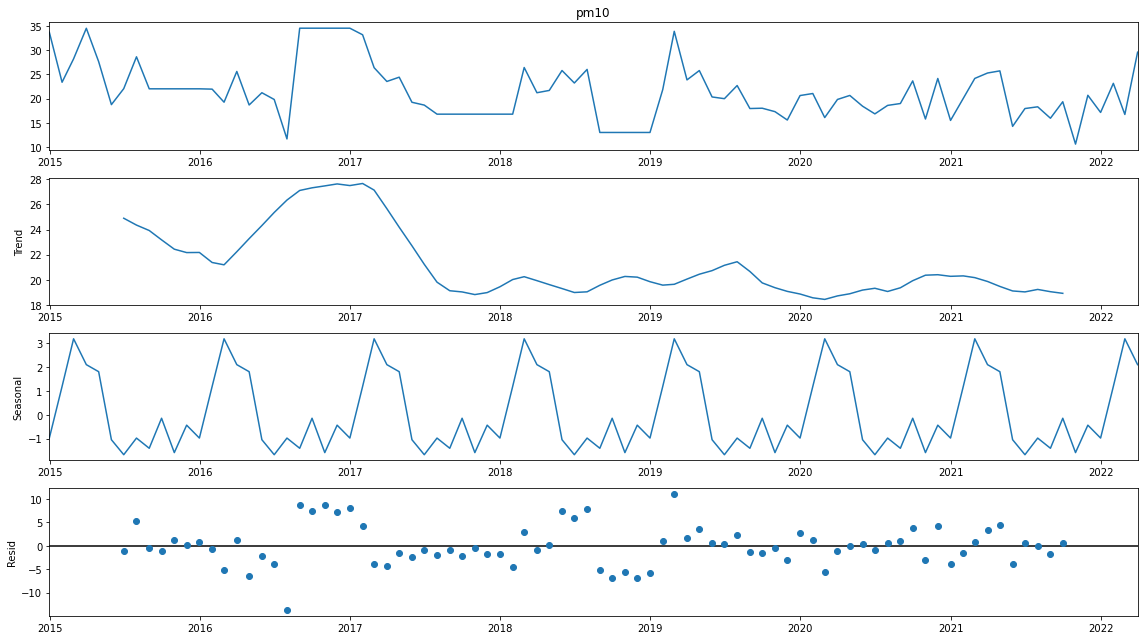

In [30]:
#PARIS
model = seasonal_decompose((Paris_Data.resample('1m').mean().bfill())["no2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Paris_Data.resample('1m').mean().bfill())["so2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Paris_Data.resample('1m').mean().bfill())["o3"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Paris_Data.resample('1m').mean().bfill())["pm25"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Paris_Data.resample('1m').mean().bfill())["pm10"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

## Seasonality of daily resampled data

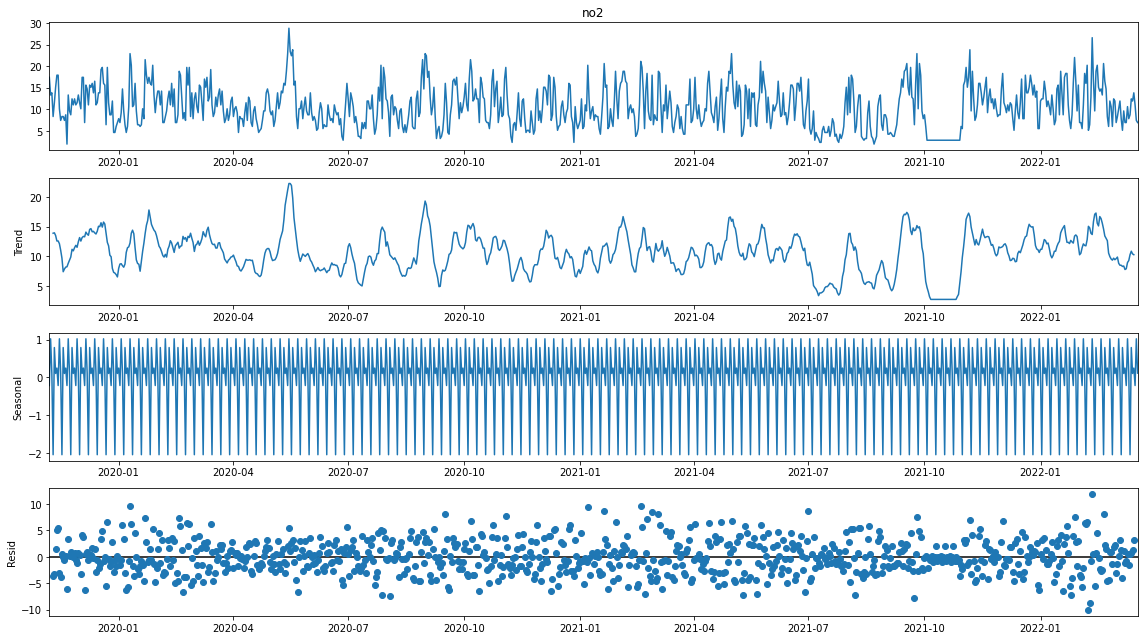

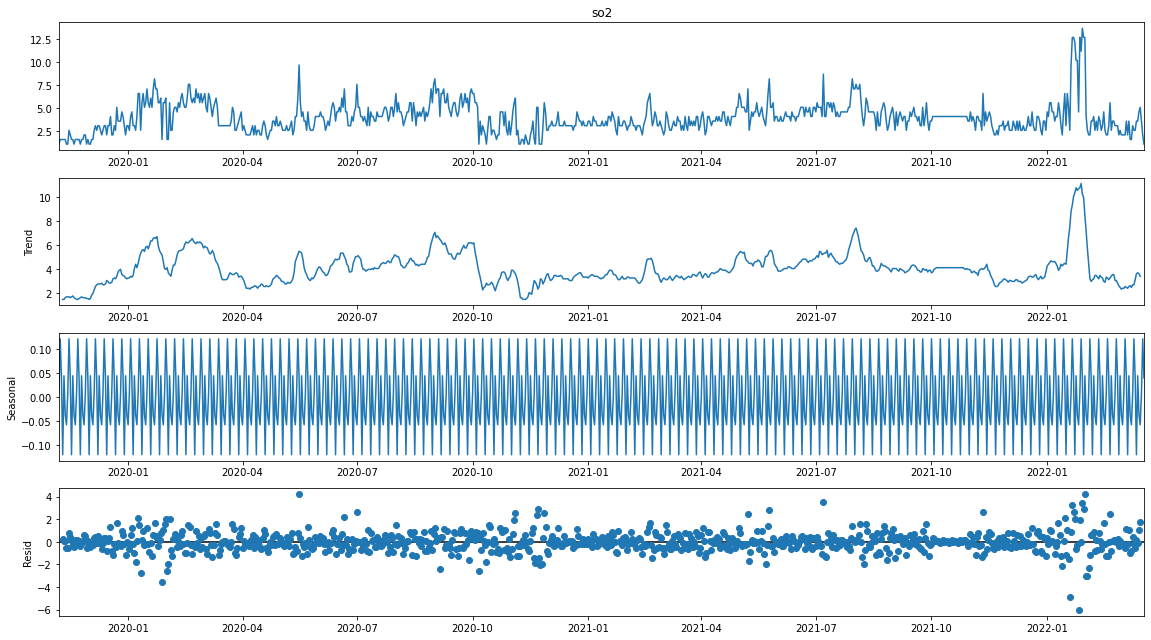

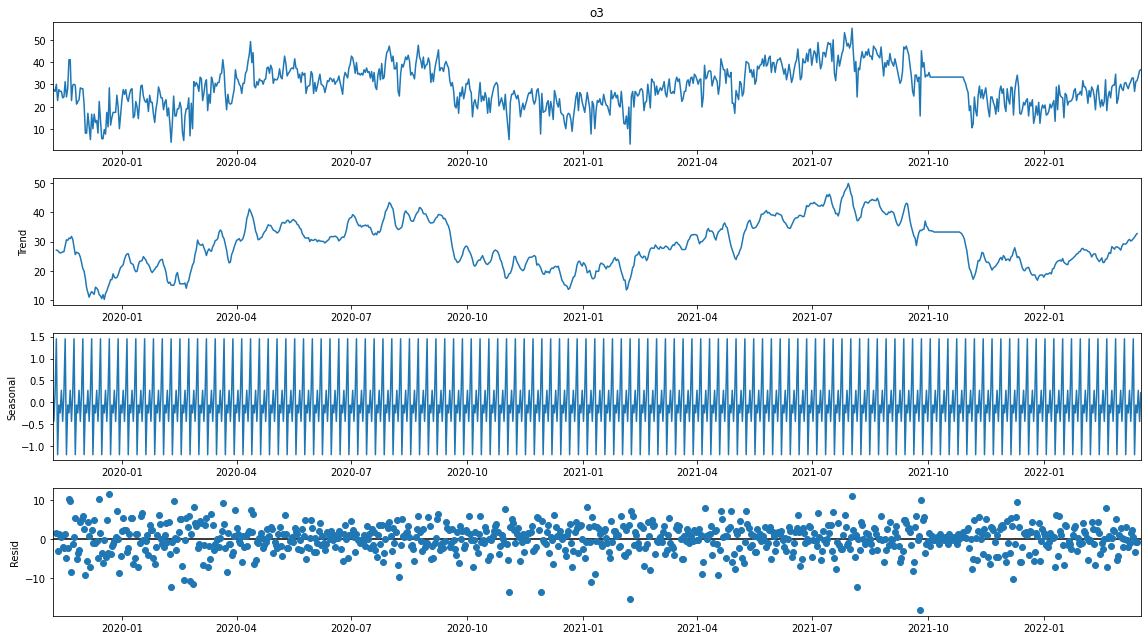

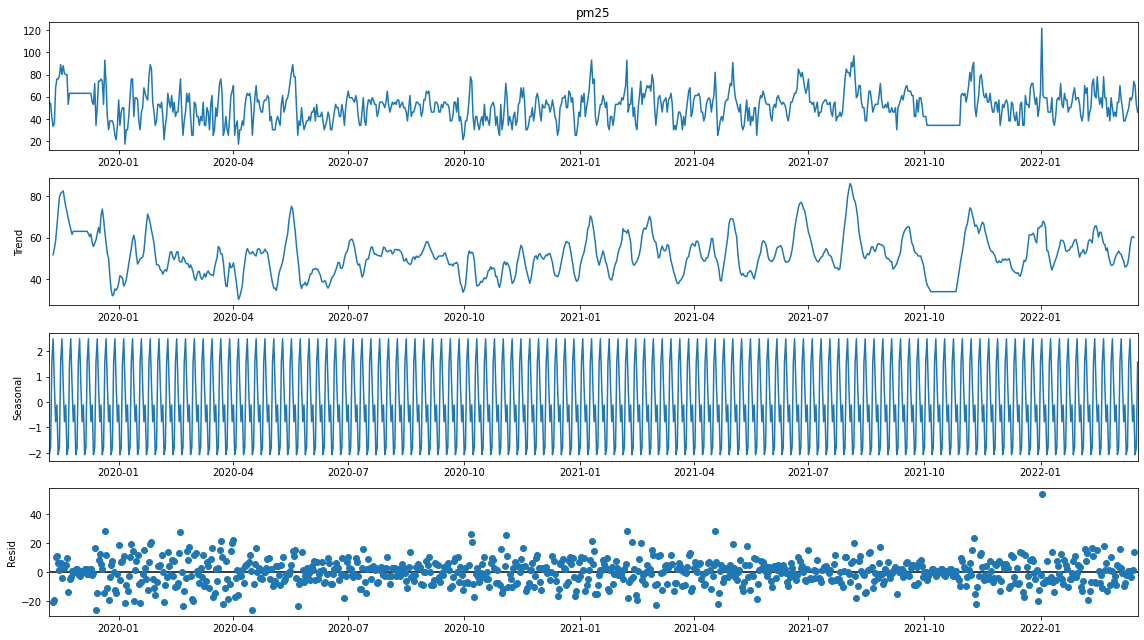

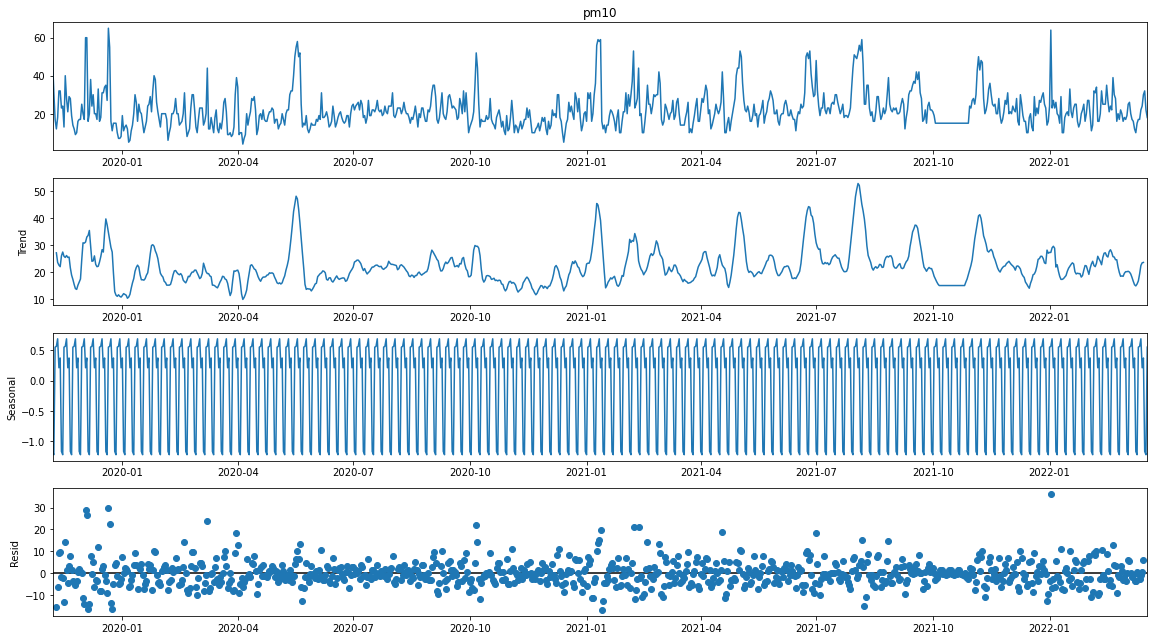

In [32]:
#ATHENS
model = seasonal_decompose((Athens_Data.resample('1d').mean().bfill())["no2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Athens_Data.resample('1d').mean().bfill())["so2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Athens_Data.resample('1d').mean().bfill())["o3"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Athens_Data.resample('1d').mean().bfill())["pm25"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Athens_Data.resample('1d').mean().bfill())["pm10"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

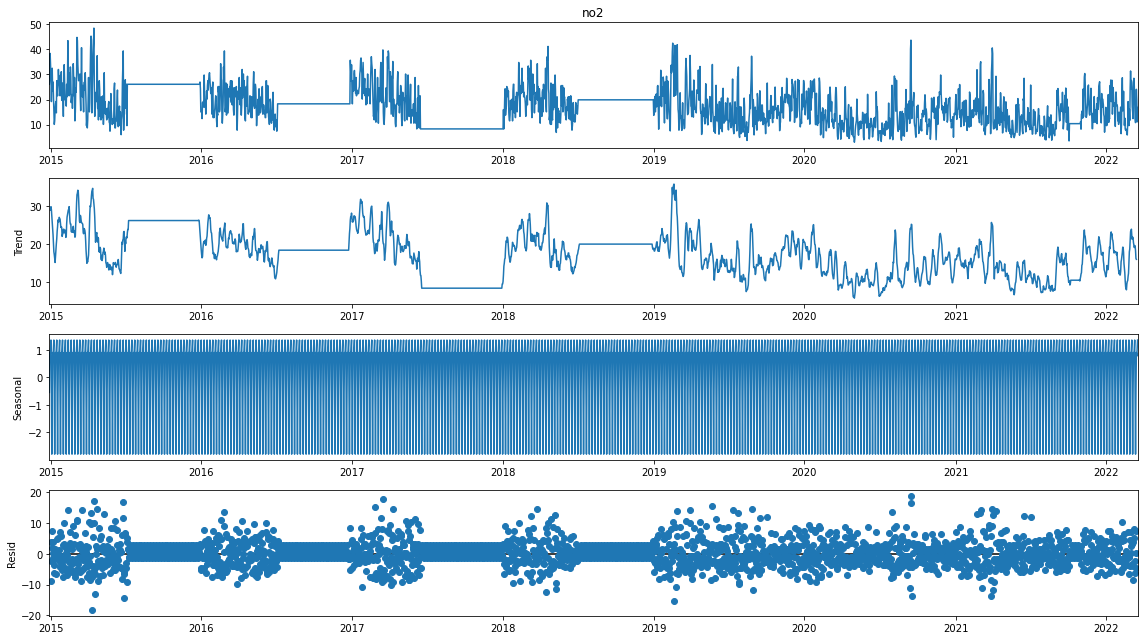

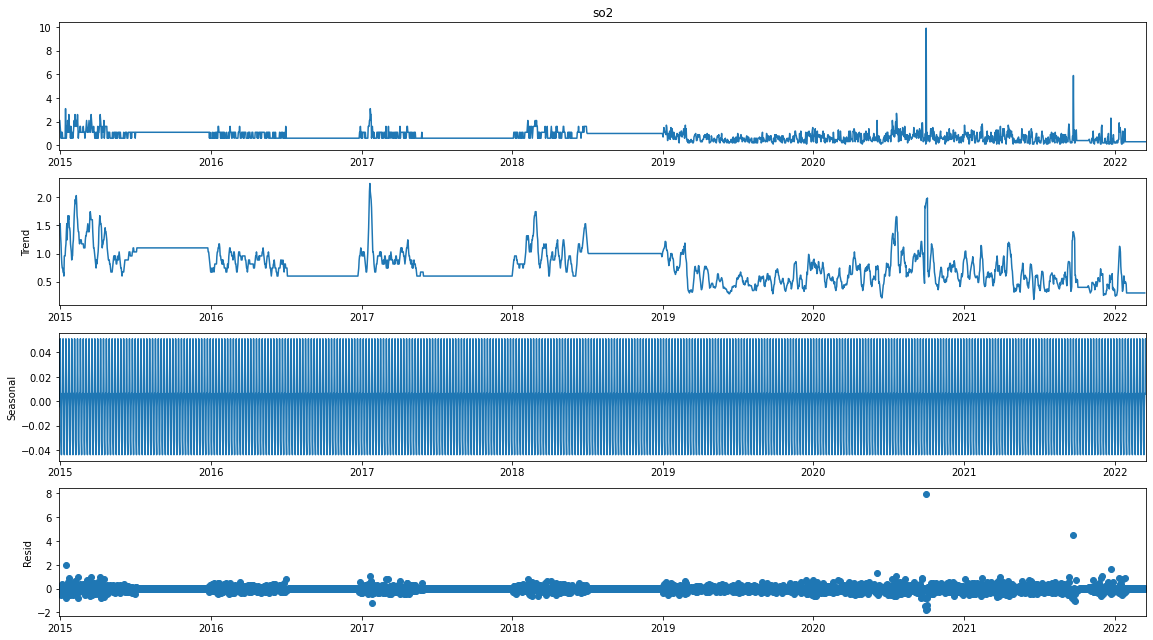

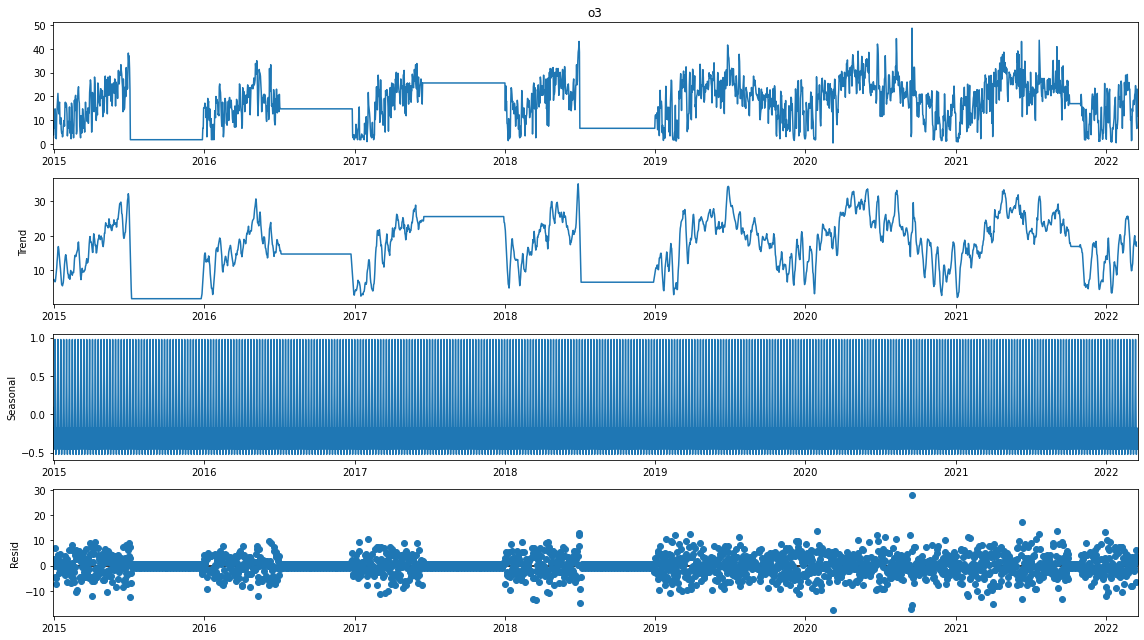

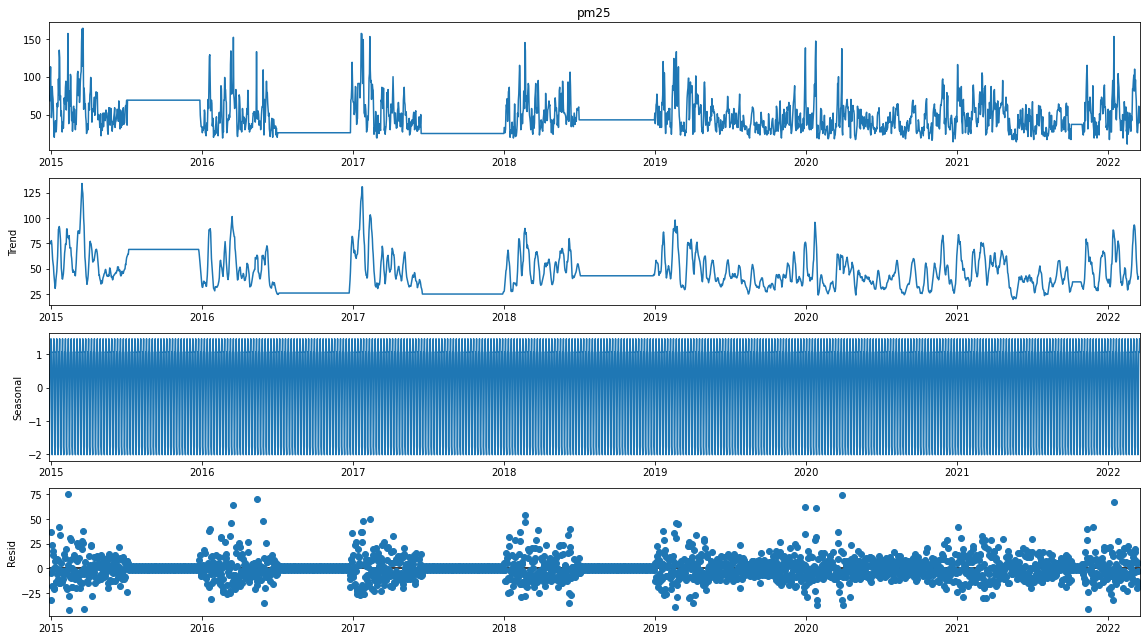

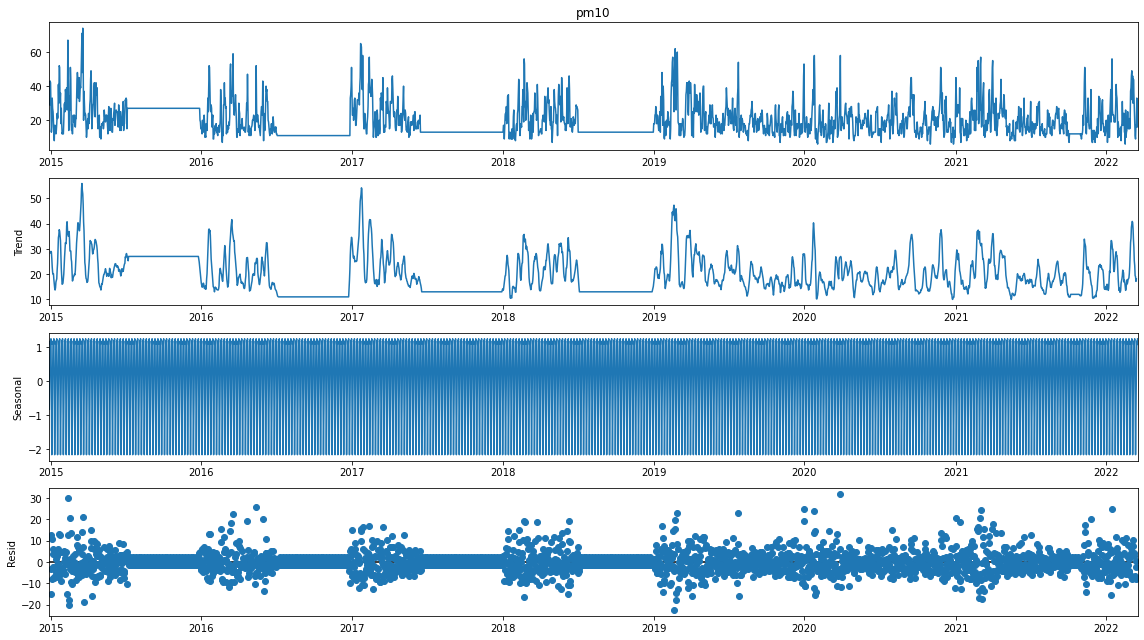

In [33]:
#Paris
model = seasonal_decompose((Paris_Data.resample('1d').mean().bfill())["no2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Paris_Data.resample('1d').mean().bfill())["so2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Paris_Data.resample('1d').mean().bfill())["o3"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Paris_Data.resample('1d').mean().bfill())["pm25"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Paris_Data.resample('1d').mean().bfill())["pm10"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

In [34]:
Athens_train_size = int(len(Athens_Data) * 0.8)
Athens_train_X, Athens_test_X = Athens_Data[0:Athens_train_size], Athens_Data[Athens_train_size:]
print("Period of train data for Athens: " + str(Athens_train_X.index[0]) + " till " +
     str(Athens_train_X.index[-1]) +"\n")
print("Period of test data for Athens: " + str(Athens_test_X.index[0]) + " till " +
     str(Athens_test_X.index[-1]) +"\n")


Paris_train_size = int(len(Paris_Data) * 0.8)
Paris_train_X, Paris_test_X = Paris_Data[0:Paris_train_size], Paris_Data[Paris_train_size:]
print("Period of train data for Paris: " + str(Paris_train_X.index[0]) + " till " +
     str(Paris_train_X.index[-1]) +"\n")
print("Period of test data for Paris: " + str(Paris_test_X.index[0]) + " till " +
     str(Paris_test_X.index[-1]) +"\n")

Period of train data for Athens: 2019-11-07 00:00:00 till 2021-09-07 00:00:00

Period of test data for Athens: 2021-09-08 00:00:00 till 2022-03-19 00:00:00

Period of train data for Paris: 2014-12-29 00:00:00 till 2021-02-10 00:00:00

Period of test data for Paris: 2021-02-11 00:00:00 till 2022-03-18 00:00:00

